In [2]:
from functions import *
from parameters_GaAs_QW import *
#from parameters import t_list as t
import pickle
import math

In [8]:
delta_t = '2000.0'
E_1 = '0.66'
Qdim = '1000'


with open(r"results/dt={}_E1={}_Qdim={}_Ns_RK.pickle".format(delta_t, E_1, Qdim), 'rb') as output_file:
    N_ts = pickle.load(output_file)

with open(r"results/dt={}_E1={}_Qdim={}_Ps_RK.pickle".format(delta_t, E_1, Qdim), 'rb') as output_file:
    P_ts = pickle.load(output_file)

t = tlist
indices_p = [[2,-1],[1,0],[0,1]]
indices_n = [[-1,1],[0,0]]

140000
200000


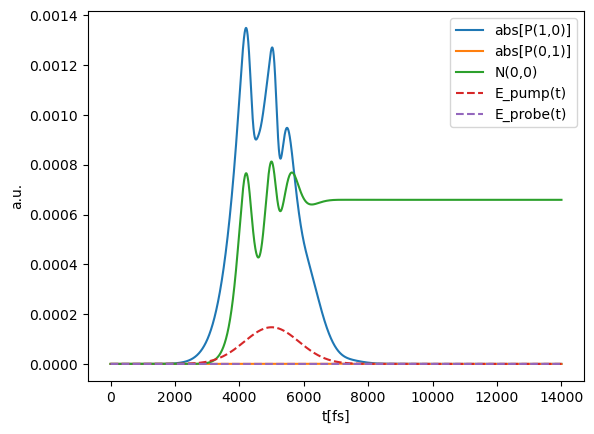

In [9]:
#Plot desired results
end = 140000
print(end)
print(len(P_ts[2]))
for n in [1,2]: 
    index = indices_p[n]
    #print(index[0])
   # plt.plot(tlist[:2000],np.imag(P_ts[n])[:2000], label = 'Im[P({},{})]'.format(index[0],index[1]))
   # plt.plot(tlist[:2000],np.real(P_ts[n])[:2000], label = 'Re[P]({},{})]'.format(index[0],index[1]))
    plt.plot(t[:end],np.abs(P_ts[n][:end]), label = 'abs[P({},{})]'.format(index[0],index[1]))
for n in [1]:
    index = indices_n[n]
    plt.plot(t[:end],np.real(N_ts[n][:end]), label = 'N({},{})'.format(index[0],index[1]))



plt.plot(t[:end], 0.1* np.abs(E1(t[:end],float(E_1)*2*np.pi*hbar/d_cv )),'--',label = 'E_pump(t)')
plt.plot(t[:end], 0.1*np.abs(E2(t[:end],E_2, float(delta_t))),'--',label = 'E_probe(t)')
plt.xlabel('t[fs]')
plt.ylabel('a.u.')
plt.legend()
#plt.savefig('results/dt={}_E1={}_time_evolution_RK.pdf'.format(delta_t, E_1))


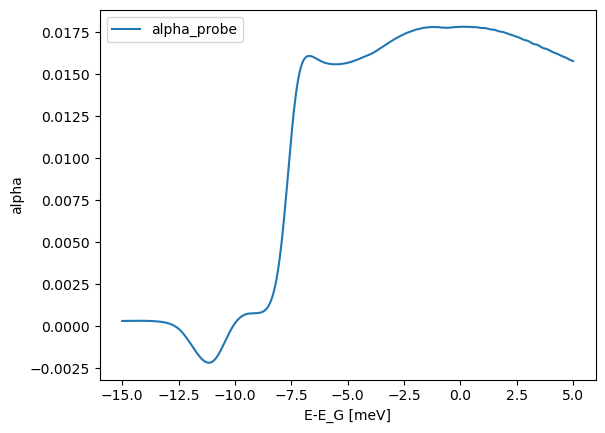

In [10]:
absorption_probe = get_spectrum(P_ts[2], t, E_2, dt = float(delta_t), field = 'E2')
plt.plot(1000 * hbar*(omega_list- 0.012903883497007542), absorption_probe, label = 'alpha_probe')
#plt.plot(100 * hbar*omega_list, 0.1*fouriertrafo(E1(t,pump_strength)), label = 'pump_field')

plt.xlabel('E-E_G [meV]')
plt.ylabel('alpha')
plt.legend()
plt.savefig('results/dt={}_E1={}_Qdim={}_spectrum_RK.pdf'.format(delta_t, E_1,Qdim))
with open(r"results/dt={}_E1={}_Qdim={}_absorption_probe.pickle".format(delta_t, E_1,Qdim), 'wb') as output_file:
    pickle.dump(absorption_probe, output_file)

In [20]:
delta_t = '2000.0'
E_1 = '0.66'
Qdim = ['700','1000','1000', '1333']
comments = ['_quadratic_grid_intra_rel=False', '_quadratic_grid_intra_rel=False','linear_grid_intra_rel=False', 'linear_grid_intra_rel=False']
N_list = []
P_list = []
n_distr_list = []

for i, comment in enumerate(comments):
    with open(r"results/dt={}_E1={}_Qdim={}{}_Ns_RK.pickle".format(delta_t, E_1, Qdim[i], comments[i]), 'rb') as output_file:
        N_ts = pickle.load(output_file)

    with open(r"results/dt={}_E1={}_Qdim={}{}_Ps_RK.pickle".format(delta_t, E_1, Qdim[i], comments[i]), 'rb') as output_file:
        P_ts = pickle.load(output_file)

    with open(r"results/dt={}_E1={}_Qdim={}{}_ndistr_att2.pickle".format(delta_t, E_1, Qdim[i], comments[i]), 'rb') as output_file:
        n_dis = pickle.load(output_file)
    
    N_list.append(N_ts)
    P_list.append(P_ts)
    n_distr_list.append(n_dis)

    t = tlist
indices_p = [[2,-1],[1,0],[0,1]]
indices_n = [[-1,1],[0,0]]

FileNotFoundError: [Errno 2] No such file or directory: 'results/dt=2000.0_E1=0.66_Qdim=1333linear_grid_intra_rel=False_Ns_RK.pickle'

140000
200000


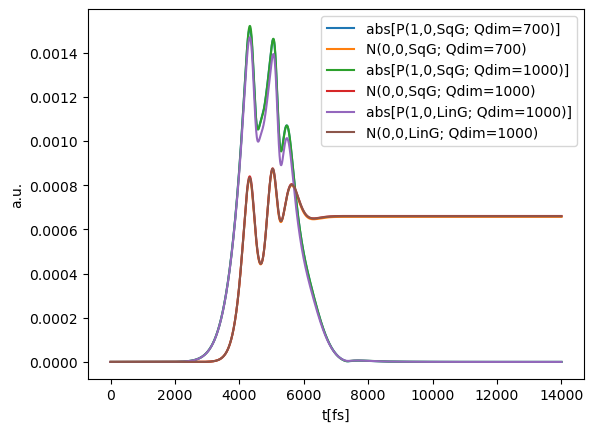

In [3]:
labels = ['SqG; Qdim=700', 'SqG; Qdim=1000','LinG; Qdim=1000']
#Plot desired results
end = 140000
print(end)
print(len(P_ts[2]))
for i in range(len(N_list)):
    for n in [1]: 
        index = indices_p[n]
        #print(index[0])
    # plt.plot(tlist[:2000],np.imag(P_ts[n])[:2000], label = 'Im[P({},{})]'.format(index[0],index[1]))
    # plt.plot(tlist[:2000],np.real(P_ts[n])[:2000], label = 'Re[P]({},{})]'.format(index[0],index[1]))
        plt.plot(t[:end],np.abs(P_list[i][n][:end]), label = 'abs[P({},{},{})]'.format(index[0],index[1], labels[i]))
    for n in [1]:
        index = indices_n[n]
        plt.plot(t[:end],np.real(N_list[i][n][:end]), label = 'N({},{},{})'.format(index[0],index[1], labels[i]))



#plt.plot(t[:end], 0.1* np.abs(E1(t[:end],float(E_1)*2*np.pi*hbar/d_cv )),'--',label = 'E_pump(t)')
#plt.plot(t[:end], 0.1*np.abs(E2(t[:end],E_2, float(delta_t))),'--',label = 'E_probe(t)')
plt.xlabel('t[fs]')
plt.ylabel('a.u.')
plt.legend()

In [19]:
start = 0
stop = 1000
for i in range(len(P_list)):
    #absorption_probe = get_spectrum(P_list[i][2], t, E_2, dt = float(delta_t), field = 'E2')
    with open(r"results/dt={}_E1={}_Qdim={}_Qmax=1.5{}_absorption_probe.pickle".format(delta_t, E_1, Qdim[i], comments[i]), 'rb') as output_file:
       absorption_probe = pickle.load(output_file)

    plt.plot(1000 * hbar*(omega_list[start:stop]- 0.012903883497007542), absorption_probe[start:stop], label = labels[i])
    #plt.plot(100 * hbar*omega_list, 0.1*fouriertrafo(E1(t,pump_strength)), label = 'pump_field')
#with open(r"results/Cluster/dt=-3000.0_E1=0.0001_Qdim=1000_absorption_probe.pickle", 'rb') as output_file:
 #   absorption_probe = pickle.load(output_file)

#with open("results/dt=2000.0_E1=0.66_Qdim=1000_absorption_probe.pickle", 'rb') as output_file:
#   absorption_probe = pickle.load(output_file)
#plt.plot(1000 * hbar*(omega_list[start:stop]- 0.012903883497007542), absorption_probe[start:stop], label = 'linear_old_Qdim=1000')
#plt.fill_between(1000 * hbar*(omega_list- 0.012903883497007542), 0.5*np.abs(0.01*fouriertrafo(E1(t, float(E_1)*2*np.pi*hbar/d_cv ))),color = 'lightgray', label = '0.5*E_pump')
#plt.plot(1000 * hbar*(omega_list- 0.012903883497007542), 0.1*absorption_probe, '--', label = r'0.1*linear_absorption')
plt.xlabel('E-E_G [meV]')
plt.ylabel('absorption')
plt.legend()
#plt.savefig('results/dt={}_E1={}_spectra_comparison_sqlin.pdf'.format(delta_t, E_1,Qdim))


NameError: name 'P_list' is not defined

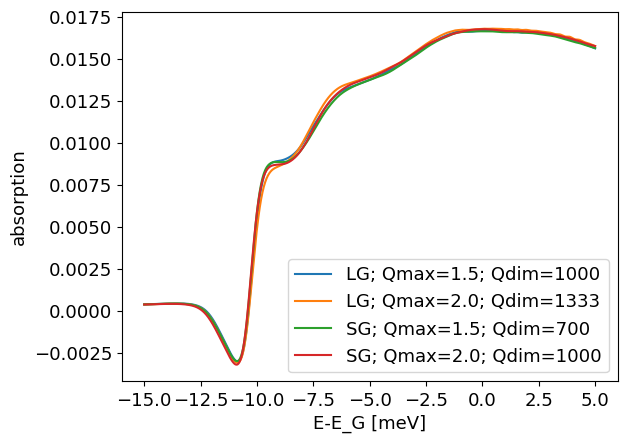

In [45]:
start = 0
stop = 1000

    #absorption_probe = get_spectrum(P_list[i][2], t, E_2, dt = float(delta_t), field = 'E2')

with open(r"results/dt=2000.0_E1=0.66_Qdim=1000linear_grid_intra_rel=False_absorption_probe.pickle".format(delta_t, E_1, Qdim[i], comments[i]), 'rb') as output_file:
    absorption_probe = pickle.load(output_file)
plt.plot(1000 * hbar*(omega_list[start:stop]- 0.012903883497007542), absorption_probe[start:stop], label = 'LG; Qmax=1.5; Qdim=1000')
with open(r"results/dt=2000.0_E1=0.66_Qdim=1333_Qmax=2.0linear_grid_intra_rel=False_absorption_probe.pickle".format(delta_t, E_1, Qdim[i], comments[i]), 'rb') as output_file:
    absorption_probe = pickle.load(output_file)
plt.plot(1000 * hbar*(omega_list[start:stop]- 0.012903883497007542), absorption_probe[start:stop], label = 'LG; Qmax=2.0; Qdim=1333')
#with open(r"results/dt=2000.0_E1=0.66_Qdim=600_Qmax=1.5_quadratic_grid_intra_rel=False_absorption_probe.pickle".format(delta_t, E_1, Qdim[i], comments[i]), 'rb') as output_file:
 #   absorption_probe = pickle.load(output_file)
#plt.plot(1000 * hbar*(omega_list[start:stop]- 0.012903883497007542), absorption_probe[start:stop], label = 'SG; Qmax=1.5; Qdim=600')
with open(r"results/dt=2000.0_E1=0.66_Qdim=700_Qmax=1.5_quadratic_grid_intra_rel=False_absorption_probe.pickle".format(delta_t, E_1, Qdim[i], comments[i]), 'rb') as output_file:
    absorption_probe = pickle.load(output_file)
plt.plot(1000 * hbar*(omega_list[start:stop]- 0.012903883497007542), absorption_probe[start:stop], label = 'SG; Qmax=1.5; Qdim=700')
with open(r"results/dt=2000.0_E1=0.66_Qdim=1000_quadratic_grid_intra_rel=False_absorption_probe.pickle".format(delta_t, E_1, Qdim[i], comments[i]), 'rb') as output_file:
    absorption_probe = pickle.load(output_file)
plt.plot(1000 * hbar*(omega_list[start:stop]- 0.012903883497007542), absorption_probe[start:stop], label = 'SG; Qmax=2.0; Qdim=1000')


    #plt.plot(100 * hbar*omega_list, 0.1*fouriertrafo(E1(t,pump_strength)), label = 'pump_field')
#with open(r"results/Cluster/dt=-3000.0_E1=0.0001_Qdim=1000_absorption_probe.pickle", 'rb') as output_file:
 #   absorption_probe = pickle.load(output_file)

#with open("results/dt=2000.0_E1=0.66_Qdim=1000_absorption_probe.pickle", 'rb') as output_file:
#   absorption_probe = pickle.load(output_file)
#plt.plot(1000 * hbar*(omega_list[start:stop]- 0.012903883497007542), absorption_probe[start:stop], label = 'linear_old_Qdim=1000')
#plt.fill_between(1000 * hbar*(omega_list- 0.012903883497007542), 0.5*np.abs(0.01*fouriertrafo(E1(t, float(E_1)*2*np.pi*hbar/d_cv ))),color = 'lightgray', label = '0.5*E_pump')
#plt.plot(1000 * hbar*(omega_list- 0.012903883497007542), 0.1*absorption_probe, '--', label = r'0.1*linear_absorption')
plt.xlabel('E-E_G [meV]')
plt.ylabel('absorption')
plt.legend()
plt.savefig('results/dt={}_E1={}_spectra_comparison_sqlin.pdf'.format(delta_t, E_1),bbox_inches='tight')


In [44]:
qlists = []
qlists.append((np.linspace(1.5/700, 1.5, 700))**2/(1.5))
qlists.append((np.linspace(1.5/1000, 1.5, 1000))**2/(1.5))
qlists.append(np.linspace(1.5/1000, 1.5, 1000))
for i, n_dist in enumerate(n_distr_list):
    #absorption_probe = get_spectrum(P_list[i][2], t, E_2, dt = float(delta_t), field = 'E2')

    plt.plot(qlists[i], n_dist, label = labels[i])
    #plt.plot(100 * hbar*omega_list, 0.1*fouriertrafo(E1(t,pump_strength)), label = 'pump_field')
#with open(r"results/Cluster/dt=-3000.0_E1=0.0001_Qdim=1000_absorption_probe.pickle", 'rb') as output_file:
 #   absorption_probe = pickle.load(output_file)

#plt.fill_between(1000 * hbar*(omega_list- 0.012903883497007542), 0.5*np.abs(0.01*fouriertrafo(E1(t, float(E_1)*2*np.pi*hbar/d_cv ))),color = 'lightgray', label = '0.5*E_pump')
#plt.plot(1000 * hbar*(omega_list- 0.012903883497007542), 0.1*absorption_probe, '--', label = r'0.1*linear_absorption')
plt.xlabel('E-E_G [meV]')
plt.ylabel('absorption')
plt.legend()
plt.savefig('results/dt={}_E1={}_ndistr_comparison_sqlin.pdf'.format(delta_t, E_1,Qdim))

NameError: name 'labels' is not defined

In [2]:
qlist = np.linspace(1.5/1000, 1.5, 1000)
#qlist = (np.linspace(1.5/700, 1.5, 700))**2/(1.5)
delta_t = '4000.0'
#E_1 =[0.037,0.11,0.221,0.55]
#E_1 =[0.037,0.11,0.221, 0.333]
E_1 =[10, 30, 60, 90]
Qdim = '700'
comments = '_quadratic_grid_alteUmrechnung_intra_rel=True_gamma_inter=0.0025'
n_distr =[]
spectra =[]  
for i, field in enumerate(E_1):
    try:
        with open(r"results/dt={}_E1={}_Qdim={}{}_ndistr_att2.pickle".format(delta_t, field, Qdim, comments), 'rb') as output_file:
            n_dis = pickle.load(output_file)

        with open(r"results/dt={}_E1={}_Qdim={}{}_absorption_probe.pickle".format(delta_t, field, Qdim, comments), 'rb') as output_file:
            spectrum = pickle.load(output_file)
    except:
        with open(r"results/dt={}_E1={}_Qdim={}_Qmax=1.5{}_ndistr_att2.pickle".format(delta_t, field, Qdim, comments), 'rb') as output_file:
            n_dis = pickle.load(output_file)

        with open(r"results/dt={}_E1={}_Qdim={}_Qmax=1.5{}_absorption_probe.pickle".format(delta_t, field, Qdim, comments), 'rb') as output_file:
            spectrum = pickle.load(output_file)

    
    n_distr.append(n_dis)
    spectra.append(spectrum)



In [3]:
import colorsys
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.colors import to_rgb
import matplotlib as mpl 
import math

def colorFader(c1,c2,mix=0): #fade (linear interpolate) from color c1 (at mix=0) to c2 (mix=1)
    c1=np.array(mpl.colors.to_rgb(c1))
    c2=np.array(mpl.colors.to_rgb(c2))
    return mpl.colors.to_hex((1-mix)*c1 + mix*c2)

# Funktion zum Reduzieren der Sättigung
def desaturate_color(color, factor=0.9):
    # Konvertiere die Farbe in den RGB-Farbraum
    r, g, b = to_rgb(color)
    # Konvertiere die Farbe in den HSV-Farbraum
    h, s, v = colorsys.rgb_to_hsv(r, g, b)
    # Reduziere die Sättigung
    s *= factor
    # Konvertiere die Farbe zurück in den RGB-Farbraum
    desaturated_color = colorsys.hsv_to_rgb(h, s, v)
    return desaturated_color

jet_map = plt.get_cmap('plasma')
new_colors = jet_map(np.linspace(0, 1, 5))
new_color =[desaturate_color(new_colors[i]) for i in range(5)]
SMALL_SIZE = 13
MEDIUM_SIZE = 13
BIGGER_SIZE = 14
LW = 2

lowred = desaturate_color('red')
lowblue = desaturate_color('blue')

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

linestyles =['-',':', '--','-.']#, ''] 
dashlist = [(5,2),(2,2),(1,2,4,2),(1,1)] #[(2,5),
#colorlist =['firebrick', 'green'] 
mpl.rcParams['mathtext.default'] = 'regular'

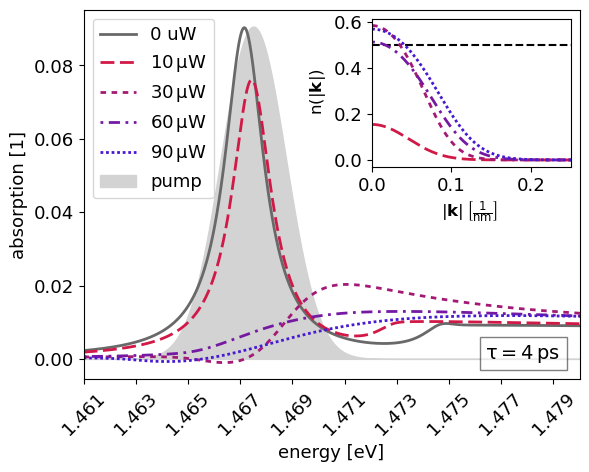

In [5]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
fig, ax = plt.subplots()
powers = np.array(E_1)
with open(r"results/dt=4000.0_E1=0_Qdim=700_Qmax=1.5_quadratic_grid_intra_rel=True_gamma_inter=0.0025_absorption_probe.pickle", 'rb') as output_file:
    absorption_probe = pickle.load(output_file)

ax.plot(hbar*(omega_list + 1.476/hbar- 0.012903883497007542), absorption_probe, '-', label = r'0 uW', linewidth = LW, linestyle = '-', color = 'dimgrey')
for i in range(len(spectra)):
    ax.plot(hbar*(omega_list + 1.476/hbar- 0.012903883497007542), spectra[i], label = str(math.ceil(powers[i]))+'$\,\mu$W', linewidth = LW, linestyle = '--', dashes = dashlist[i], color = colorFader(lowred,lowblue,(i+1)/(5)))


ax.fill_between(hbar*(omega_list+ 1.476/hbar- 0.012903883497007542), 0.1*np.abs(fouriertrafo(gauss_pulse(tlist, E_0 = 0.333*np.pi*hbar/d_cv, sigma = sigma1, t_center = t1,detuning =  0))),color = 'lightgray', label = 'pump')
plt.xlim(1.461, 1.48)
plt.xticks(np.arange(1.461, 1.48, step = 0.002), rotation = 45)
plt.xlabel('energy [eV]')
plt.ylabel('absorption [1]')
plt.legend(loc = 'upper left')

# Inset-Diagramm

ax_inset = inset_axes(ax, width="40%", height="40%", loc='upper right')
for i in range(len(n_distr)):
    ax_inset.plot(qlist[:400]**2 , np.real(n_distr[i][:400] ), label = str(math.ceil(powers[i]))+' uW',  linewidth = LW, linestyle = '--', dashes = dashlist[i], color = colorFader(lowred,lowblue,(i+1)/(5)))
ax_inset.hlines(0.5, 0.0, 0.25, linestyle = 'dashed', color = 'black')
plt.xlim(0, 0.25)
plt.xlabel(r'$|\mathbf{k}|\, \left[ \frac{1}{nm}\right]   $ ', fontsize = 12)
plt.ylabel(r' $n\left(|\mathbf{k}|\right) $ ' , fontsize = 12)
# Textbox hinzufügen
textstr = r"$\tau = 4\,ps$ "
props = dict(facecolor='white', alpha=0.5)
ax.text(0.81, 0.1, textstr, transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)

#plt.savefig('results/dt={}_Qdim={}_absorption_Efield_dependence_with_inset_lineargrid_withdecay.pdf'.format(delta_t,Qdim),bbox_inches='tight')
plt.savefig('results/dt={}_Qdim={}_absorption_Efield_dependence_with_inset_squaregrid_withdecay_test.pdf'.format(delta_t,Qdim),bbox_inches='tight')


In [5]:
delta_t = '0.0'
E_1 = [ 0.055, 0.11,0.166, 0.221 ] 
powers = np.array(E_1)*10/0.037
Qdim = '1000'
comments = ''
N_list = []
P_list = []

for i, field in enumerate(E_1):
    with open(r"results/dt={}_E1={}_Qdim={}{}_Ns_RK.pickle".format(delta_t, field, Qdim, comments), 'rb') as output_file:
        N_ts = pickle.load(output_file)

    with open(r"results/dt={}_E1={}_Qdim={}{}_Ps_RK.pickle".format(delta_t, field, Qdim, comments), 'rb') as output_file:
        P_ts = pickle.load(output_file)
    N_list.append(N_ts)
    P_list.append(P_ts)

    t = tlist
indices_p = [[2,-1],[1,0],[0,1]]
indices_n = [[-1,1],[0,0]]

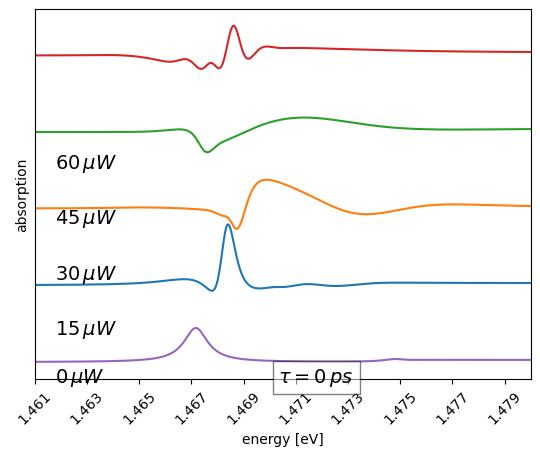

In [29]:
fig = plt.figure()
for i in range(len(P_list)):
    #absorption_probe = get_spectrum(P_list[i][2], t, E_2, dt = float(delta_t), field = 'E2')
    with open(r"results/dt={}_E1={}_Qdim={}{}_absorption_probe.pickle".format(delta_t, E_1[i], Qdim, comments), 'rb') as output_file:
       absorption_probe = pickle.load(output_file)

    plt.plot(hbar*(omega_list+ 1.476/hbar- 0.012903883497007542), absorption_probe + 0.4*(i+1), label = r'{} $\mu W $ '.format(powers[i]))
    textstr = r"${}\,\mu W $".format(math.ceil(powers[i]))
    plt.text(-0.05, 0.23+i*0.15, textstr, transform=ax.transAxes, fontsize=14,
        verticalalignment='top')
    #plt.plot(100 * hbar*omega_list, 0.1*fouriertrafo(E1(t,pump_strength)), label = 'pump_field')
with open(r"results/Cluster/dt=-3000.0_E1=0.0001_Qdim=1000_absorption_probe.pickle", 'rb') as output_file:
    absorption_probe = pickle.load(output_file)

#plt.fill_between(hbar*(omega_list+ 1.476/hbar- 0.012903883497007542), 0.1*np.abs(fouriertrafo(E1(tlist, float(E_1[1])*2*np.pi*hbar/d_cv ))),color = 'lightgray', label = 'pump')
plt.plot(hbar*(omega_list+ 1.476/hbar- 0.012903883497007542), absorption_probe, label = r'linear_absorption')
plt.xlabel('energy [eV]')
plt.ylabel('absorption')
plt.yticks([],[])
plt.xlim(1.461, 1.48)
plt.xticks(np.arange(1.461, 1.48, step = 0.002), rotation = 45)
# Textbox hinzufügen
textstr = r"$\tau = 0\,ps$ "
props = dict(facecolor='white', alpha=0.5)
plt.text(0.4, 0.1, textstr, transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)
textstr = r"$0\,\mu W $"
plt.text(-0.05, 0.1, textstr, transform=ax.transAxes, fontsize=14,
    verticalalignment='top')

plt.savefig('results/dt={}_Qdim={}_E1_dependency_spectra.pdf'.format(delta_t, E_1,Qdim), dpi = fig.dpi, bbox_inches='tight')

In [40]:
Ps =[]
absorptions = [] 
E_1 =[0, 0.5, 6, 15, 60]
for i, field in enumerate(E_1):
    with open(r"results/dt={}_E1={}_Qdim={}_Qmax=1.5{}_Ps_RK.pickle".format(delta_t, field, 700, comments), 'rb') as output_file:
        pol = pickle.load(output_file)
    with open(r"results/dt={}_E1={}_Qdim={}_Qmax=1.5{}_absorption_probe.pickle".format(delta_t, field, 700, comments), 'rb') as output_file:
        abs = pickle.load(output_file)
    
    Ps.append(pol)
    absorptions.append(abs)



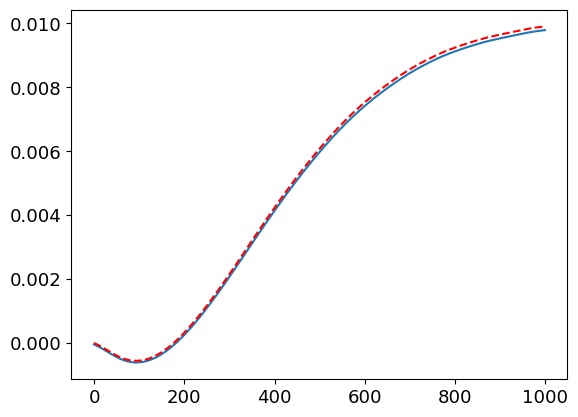

In [60]:
abs_old = get_spectrum(Ps[4][2], t1+ 4000, tlist, E_2, sigma2, method = '1-R-T')
plt.plot(abs_old)
plt.plot(absorptions[4], 'r--')

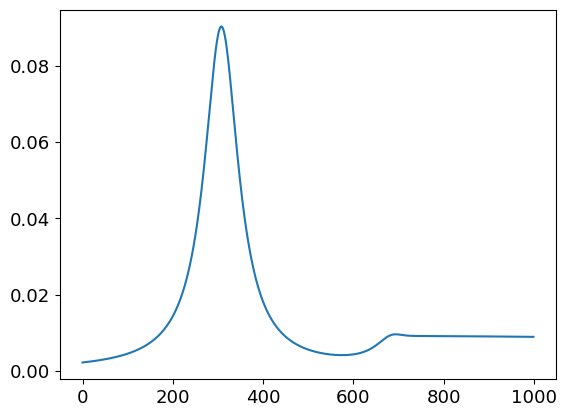

In [42]:
plt.plot(absorptions[0])

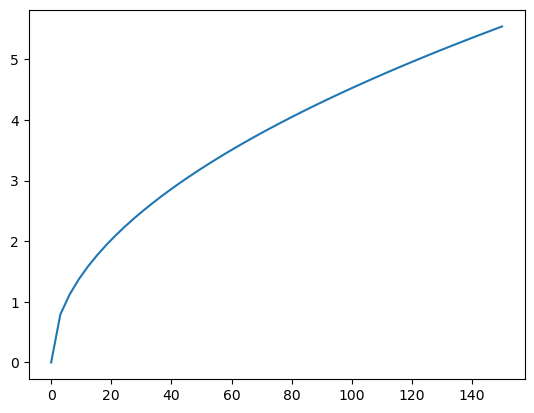

In [10]:
from functions import *
import matplotlib.pyplot as plt
plt.plot(np.linspace(0,150,50),E0_from_power(np.linspace(0,150,50)))

In [20]:
import numpy as np
from parameters import *
print(770/(2*np.sqrt(np.log(2))))

462.4321273827832


2.36128427422774